# Working with time series, frequency series, and unit conversion

In this notebook, we show some of the most useful features of the [timeseries](../series.rst) module. To do so, we will analyze a fake gravitational-wave signal. We will also show the [frequencyseries](../series.rst) module and the [unitconv](../unitconv.rst) modules.

First, let's generate this signal. 

(This notebook is meant to be converted in Sphinx documentation and not used directly.)

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from kuibit import timeseries as ts
from kuibit import series
from kuibit import unitconv as uc
from kuibit.gw_utils import luminosity_distance_to_redshift

%matplotlib inline

In [2]:
t = np.linspace(0, 20, 5000)
y = np.sin(t)

# Generate a TimeSeries by providing the times and the values of the series
gw = ts.TimeSeries(t, y)

To access the times and the values, use ``gw.t`` and ``gw.y``. You can also iterate over the series with a for loop yielding the elements `(t, y)` at each iteration of the loop. For example.

In [3]:
for tt, yy in gw:
    print(tt, yy)

0.0 0.0
0.004000800160032006 0.004000789486971321
0.008001600320064013 0.008001514935783532
0.012002400480096018 0.012002112309302542
0.016003200640128026 0.016002517572444287
0.020004000800160033 0.020002666693199687
0.024004800960192037 0.024002495643659576
0.028005601120224044 0.028001940401039562
0.03200640128025605 0.03200093694870479
0.03600720144028806 0.03599942127719461
0.040008001600320066 0.03999732938524717
0.04400880176035207 0.0439945972808238
0.048009601920384073 0.04799116098213332
0.05201040208041608 0.05198695651865616
0.05601120224044809 0.055981919932168285
0.060012002400480095 0.059975987277764924
0.0640128025605121 0.06396909462488413
0.0680136027205441 0.06796117805833003
0.07201440288057612 0.07195217367929596
0.07601520304060812 0.07594201760638712
0.08001600320064013 0.07993064597664322
0.08401680336067213 0.08391799494656059
0.08801760352070415 0.08790400069311417
0.09201840368073615 0.09188859941477902
0.09601920384076815 0.09587172733255157
0.10002000400080

 -0.41060756479389593
3.5687137427485496 -0.41425224715490805
3.5727145429085816 -0.4178902988368001
3.5767153430686136 -0.4215216616075325
3.5807161432286456 -0.4251462773421307
3.5847169433886776 -0.4287640880236157
3.5887177435487096 -0.43237503574393304
3.5927185437087417 -0.43597906270487924
3.5967193438687737 -0.4395761112190272
3.6007201440288057 -0.4431661237106494
3.6047209441888377 -0.44674904271663973
3.6087217443488697 -0.45032481088743304
3.6127225445089017 -0.4538933709879231
3.6167233446689337 -0.45745466589837885
3.6207241448289658 -0.4610086386153587
3.6247249449889978 -0.46455523225262274
3.62872574514903 -0.4680943900420435
3.632726545309062 -0.4716260553345145
3.636727345469094 -0.47515017160085704
3.640728145629126 -0.47866668243272503
3.644728945789158 -0.48217553154350773
3.64872974594919 -0.48567666276923094
3.652730546109222 -0.4891700200694558
3.656731346269254 -0.49265554752817603
3.660732146429286 -0.4961331893547125
3.664732946589318 -0.49960288988460666
3.

7.061412282456491 0.7020178471617724
7.065413082616523 0.7048614284268354
7.069413882776555 0.7076937274116258
7.073414682936587 0.7105146987812883
7.077415483096619 0.7133242973822813
7.081416283256651 0.7161224782431006
7.085417083416683 0.7189091965749983
7.089417883576715 0.7216844077727003
7.093418683736747 0.7244480674151198
7.097419483896779 0.7272001312660691
7.101420284056811 0.7299405552749667
7.105421084216843 0.732669295577543
7.109421884376875 0.7353863084965423
7.113422684536907 0.7380915505424217
7.117423484696939 0.7407849784140476
7.121424284856971 0.7434665489993882
7.125425085017003 0.7461362193762046
7.129425885177035 0.7487939468127364
7.133426685337067 0.7514396887683868
7.137427485497099 0.7540734028944035
7.141428285657131 0.7566950470345556
7.145429085817163 0.7593045792258093
7.149429885977195 0.7619019576989993
7.153430686137227 0.7644871408794972
7.157431486297259 0.7670600873878773
7.161432286457291 0.7696207560405786
7.165433086617323 0.7721691058505639
7.


10.374074814962993 -0.813006295716066
10.378075615123025 -0.8153292683359189
10.382076415283057 -0.8176391904852129
10.38607721544309 -0.8199360251904549
10.390078015603121 -0.8222197356876346
10.394078815763153 -0.8244902854228127
10.398079615923185 -0.8267476380527059
10.402080416083217 -0.828991757445269
10.40608121624325 -0.8312226076802729
10.410082016403281 -0.8334401530498797
10.414082816563313 -0.8356443580592146
10.418083616723345 -0.837835187426933
10.422084416883378 -0.8400126060857863
10.42608521704341 -0.8421765791831831
10.430086017203442 -0.8443270720817462
10.434086817363474 -0.8464640503598678
10.438087617523506 -0.8485874798122605
10.442088417683538 -0.8506973264505043
10.44608921784357 -0.8527935565035909
10.450090018003602 -0.8548761364184644
10.454090818163634 -0.8569450328605581
10.458091618323666 -0.8590002127143281
10.462092418483698 -0.8610416430837837
10.46609321864373 -0.8630692912930132
10.47009401880376 -0.8650831248867072
10.474094818963792 -0.86708311163

0.8895512524376996
13.666733346669334 0.8913718353966493
13.670734146829366 0.8931781507187722
13.674734946989398 0.8949701694914977
13.67873574714943 0.8967478630310913
13.682736547309462 0.8985112028831139
13.686737347469494 0.9002601608228767
13.690738147629526 0.9019947088558932
13.694738947789558 0.9037148192183275
13.69873974794959 0.9054204643774386
13.702740548109622 0.9071116170320209
13.706741348269654 0.9087882501128414
13.710742148429686 0.9104503367830729
13.714742948589718 0.9120978504387237
13.71874374874975 0.9137307647090631
13.722744548909782 0.9153490534570441
13.726745349069814 0.9169526907797209
13.730746149229846 0.9185416510086643
13.734746949389878 0.9201159087103721
13.73874774954991 0.9216754386866766
13.742748549709942 0.9232202159751473
13.746749349869974 0.9247502158494909
13.750750150030006 0.9262654138199475
13.754750950190038 0.9277657856336815
13.75875175035007 0.9292513072751708
13.762752550510102 0.9307219549665905
13.766753350670134 0.932177705168194


16.915383076615324 -0.9347020305870833
16.919383876775356 -0.9361165597650235
16.923384676935388 -0.93751610510505
16.92738547709542 -0.9389006442055076
16.931386277255452 -0.9402701549049365
16.935387077415484 -0.9416246152824274
16.939387877575516 -0.9429640036579717
16.94338867773555 -0.9442882985928096
16.94738947789558 -0.9455974788897724
16.951390278055612 -0.9468915235936218
16.955391078215644 -0.9481704119913861
16.959391878375676 -0.9494341236126906
16.96339267853571 -0.9506826382300865
16.96739347869574 -0.9519159358593733
16.971394278855772 -0.95313399675992
16.975395079015804 -0.9543368014349803
16.979395879175836 -0.9555243306320048
16.98339667933587 -0.9566965653429491
16.9873974794959 -0.9578534868045785
16.991398279655932 -0.9589950764987677
16.995399079815964 -0.9601213161527975
16.999399879975996 -0.9612321877396476
17.00340068013603 -0.9623276734782843
17.00740148029606 -0.9634077558339463
17.011402280456092 -0.9644724175184242
17.015403080616124 -0.9655216414903379


19.64392878575715 0.7134242909487054
19.647929585917183 0.7162220637682293
19.651930386077215 0.7190083724648278
19.655931186237247 0.7217831724397836
19.65993198639728 0.7245464192785923
19.66393278655731 0.7272980687516731
19.667933586717343 0.7300380768150777
19.671934386877375 0.7327663996111942
19.675935187037407 0.7354829934694493
19.67993598719744 0.7381878149070082
19.68393678735747 0.7408808206294696
19.687937587517503 0.7435619675315588
19.691938387677535 0.7462312126978181
19.695939187837567 0.7488885134032939
19.6999399879976 0.7515338271142193
19.70394078815763 0.7541671114886969
19.707941588317663 0.7567883243773743
19.711942388477695 0.7593974238241208
19.715943188637727 0.7619943680666976
19.71994398879776 0.7645791155374269
19.72394478895779 0.7671516248638568
19.727945589117823 0.7697118548694243
19.731946389277855 0.7722597645741133
19.735947189437887 0.7747953131951116
19.73994798959792 0.777318460147463
19.74394878975795 0.779829165044717
19.747949589917983 0.7823

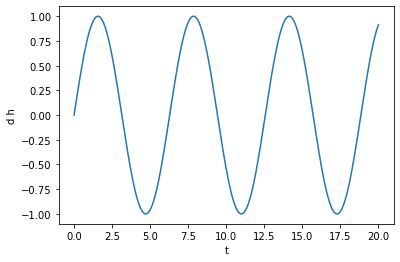

In [4]:
def plot(ser, lab1="d h", lab2="t", *args, **kwargs):
    """Plot Series ser with labels"""
    plt.ylabel(lab1)
    plt.xlabel(lab2)
    plt.plot(ser, *args, **kwargs)
    
plot(gw)

Let's make this more interesting: we square the signal and add Gaussian noise. [TimeSeries](../timeseries_ref.html#kuibit.timeseries.TimeSeries) support directly using all the basic mathematical operations in Python and NumPy, so we can easily square the signal and add another TimeSeries to it.

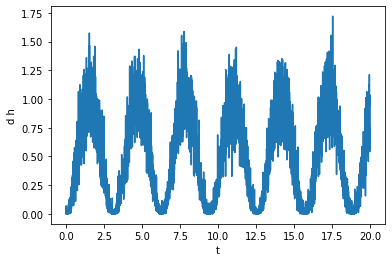

In [5]:
noise = np.random.normal(0, 0.1, len(gw))  # Here we used len() on the TimeSeries
noise_ts = ts.TimeSeries(t, noise)

gw += noise_ts
gw **= 2

plot(gw)

To analyze this signal, first we will smooth it. To do that, we will use the [savgol_smooth_time](../timeseries_ref.html#kuibit.timeseries.TimeSeries.savgol_smooth_time) method, which is a generalized "running average" filter. This method requires length of time over which we want to smooth the data.

In [TimeSeries](../timeseries_ref.html#kuibit.timeseries.TimeSeries) there are always two different methods to do the same task, one with imperative verb (e.g., smooth), and the other with the past tense (e.g., smoothed). The first modifies the data, the second returns a new `TimeSeries` with the operation applied. Here, we will find what smoothing length to use by trial and error, so we will use the second method. 

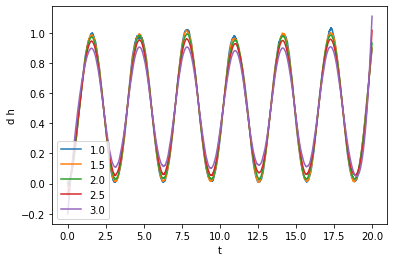

In [6]:
tsmooth = np.linspace(1, 3, 5)

for tsm in tsmooth:
    smoothed = gw.savgol_smoothed_time(tsm)
    plot(smoothed, label=tsm)
plt.legend()

From visual inspection it looks like that ``tsmooth = 1.5`` will work yield a clean series faithful to the original one.

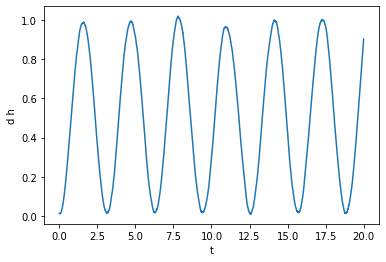

In [7]:
gw.savgol_smooth_time(1.5)
plot(gw)

Next, for fun, we can compute integrals and derivatives. For instance, we can compute what is the integral from 5 to 10.

The integral from 5 to 10 is 2.1867


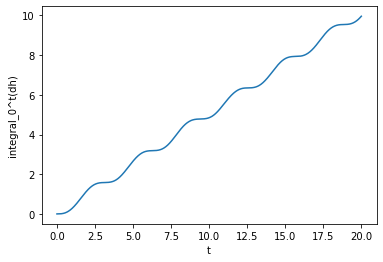

In [8]:
gw_int = gw.integrated()
a = 5
b = 10
print(f"The integral from {a} to {b} is {gw_int(b) - gw_int(a):.4f}")
plot(gw_int, lab1="integral_0^t(dh)")

Here, we showed a very powerful feature of `TimeSeries`: you can call them on a specific time (as we did we ``gw_int(b)``). This is done using splines to interpolate to the points that are not available. Splines can also be used to take derivatives. Alternatively, one can simply take the finite (central) difference. Let's see what's the derivative of ``gw`` using splines and finite difference.

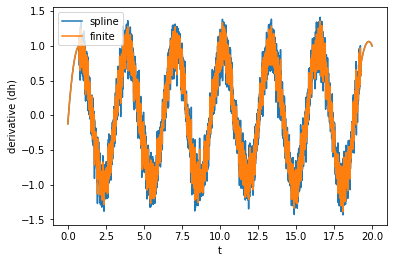

In [9]:
gw_spline_der = gw.spline_differentiated()
gw_numer_der = gw.differentiated()

plot(gw_spline_der, label='spline')
plot(gw_numer_der, lab1="derivative (dh)", label='finite')
plt.legend()

Clearly, derivatives will be noisier than the actual data, so often it is convenient to smooth them out as shown before.

TimeSeries support complex signals. Now, we will create one using `gw` itself. We will copy `gw`, time-shift it, find the common time interval with the original `gw`, and use that as a the imaginary part.

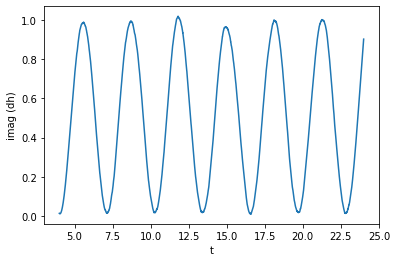

In [10]:
gw_imag = gw.copy()  # It is important to deep copy the object
gw_imag.time_shift(4)

plot(gw_imag, lab1 ="imag (dh)")

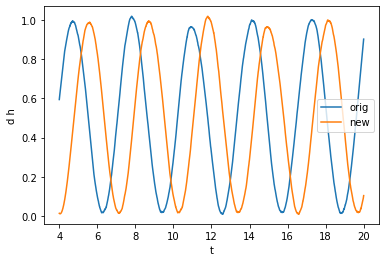

In [11]:
gw, gw_imag = series.sample_common([gw, gw_imag], resample=True)  # Resampling to common times

plot(gw, label="orig")
plot(gw_imag, label="new")
plt.legend()

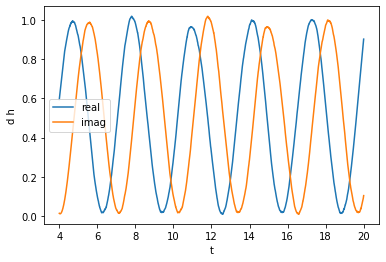

In [12]:
gw_complex = ts.TimeSeries(gw.t, gw.y + 1j * gw_imag.y)

plot(gw_complex.real(), label="real")
plot(gw_complex.imag(), label="imag")
plt.legend()

We can also compute the phase and absolute value. In particular, we will compute the unfolded phase (no wrapping over $2\pi$)

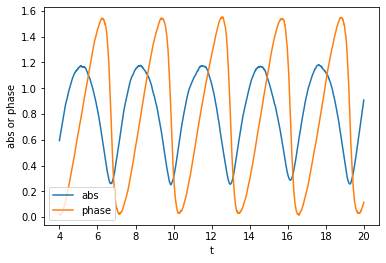

In [13]:
plot(gw_complex.abs(), label='abs')
plot(gw_complex.unfolded_phase(), lab1="abs or phase", label='phase')
plt.legend()

Here, the unfolded phase looks a little bit unusual. This is because we made up the signal.

We can also compute the frequency of the phase, which we can directly smooth.

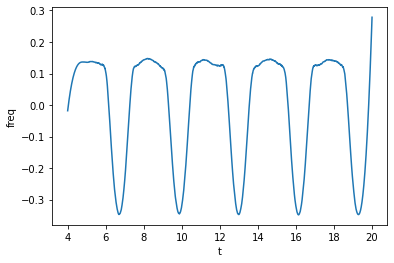

In [14]:
plot(gw_complex.phase_frequency(tsmooth=1.5), lab1="freq")

Next, we will take a Fourier transform. Before, let's pretend that the signal was in geometrized units (as in simulations), and let's make it physical assuming a scale of $M = 1 M_\odot$. For that, use the [unitconv](../unitconv.rst) module. We define a CU object that knows how to convert units.

In [15]:
CU = uc.geom_umass_msun(1) 

# How to convert from geometrized length to physical length?
# Simply multiply times CU.length. Let's check that it is 1.477 km
CU.length  # m

1476.6436994724972

Now we rescale `gw`, assuming that `y` is strain times distance (as usually is). Let's assume a distance of 500 Mpc.

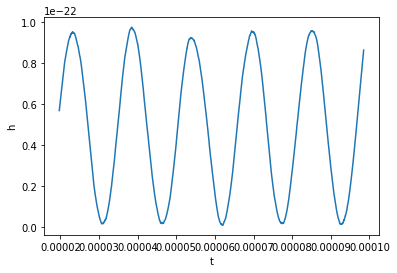

In [16]:
d_Mpc = 500

# inverse = True means from geometrized to physical
gw_physical = gw_complex.time_unit_changed(CU.time, inverse=True)  

gw_physical *= CU.length  # dh -> dh physical
# Now just the strain, since we assume a distance
gw_physical /= (d_Mpc * uc.MEGAPARSEC_SI)

# We have to manually add the redshift
gw_physical.redshifted(luminosity_distance_to_redshift(d_Mpc))

plot(gw_physical.real(), lab1="h")

Okay, now before taking the Fourier transform, we will remove the mean and window our signal. A Tukey window will work.

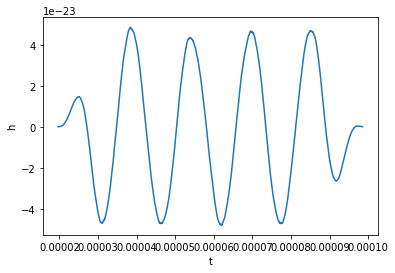

In [17]:
gw_physical.mean_remove()
gw_physical.tukey_window(0.3)
plot(gw_physical.real(), lab1="h")

Finally, we can take the Fourier transform. This is easy to do:

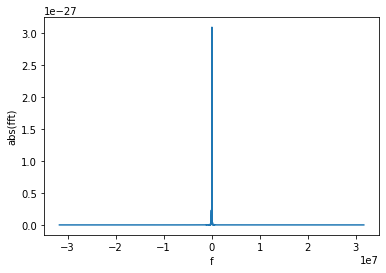

In [18]:
gw_fft = gw_physical.to_FrequencySeries()

# Plotting the amplitude of the Fourier transform
plot(gw_fft.abs(), lab1="abs(fft)", lab2="f")

The new object is a `FrequencySeries`. It is very similar to a `TimeSeries` and it shares several properties, methods, and features. 

Let's restrict to only positive frequencies close to zero.

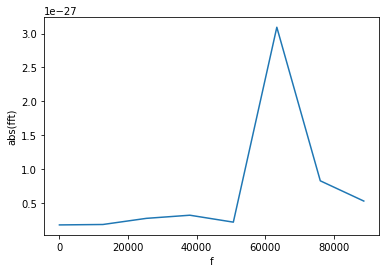

In [19]:
gw_fft.crop(0, 1e5)
plot(gw_fft.abs(), lab1="abs(fft)", lab2="f")

We can find the frequency of that peak! For this, we find all the peaks with amplitude larger than 1e-27.

Frequency: 64184.17


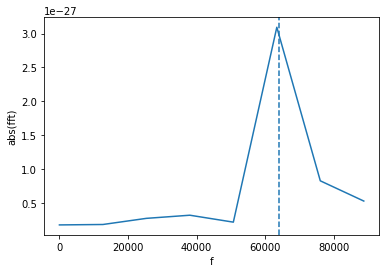

In [20]:
f_peak = gw_fft.peaks_frequencies(1e-27)[0]

print(f"Frequency: {f_peak:.2f}")
plot(gw_fft.abs(), lab1="abs(fft)", lab2="f")
plt.axvline(f_peak, ls = 'dashed')

The line is not on the maximum because we use a quadratic interpolation to find a more accurate location of the peak.

Sometimes, it is useful to ignore some data (or example, when we know that the data is invalid). `Series` objects support _masks_ to mark the points we want to ignore. Most functions work transparently with masks: for example, if you ask for the mean of a `Series`, the masked point will be ignored. Other functions do not support masks (most notably, splines). In that case, it is best to completely remove the masked points and work with clean data.

In [21]:
# Let's mask all the point in the spectrum with value larger than 1e-27

spectrum = gw_fft.abs()

print(f"Maximum without mask {spectrum.max():.3e}")

# Apply mask
spectrum.mask_greater(1e-27)

print(f"Maximum with mask {spectrum.max():.3e}")

print(f"Length with mask {len(spectrum)}")

# Remove points
spectrum.mask_remove()

print(f"Length after having removed the masked points {len(spectrum)}")

Maximum without mask 3.093e-27
Maximum with mask 8.295e-28
Length with mask 8
Length after having removed the masked points 7
